<a href="https://colab.research.google.com/github/pkalra001/ML/blob/master/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import nltk
import scipy
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import datetime



In [ ]:
f = open("test.txt")
start = pd.to_datetime(f.readline().strip("\n"))
end = pd.to_datetime(f.readline().strip("\n"))
n_periods = int(f.readline().strip("\n"))
#n_days = (end -start).days
#n_periods = (n_days+1) * 24
dt = pd.date_range(start = start, periods = n_periods, freq = 'H')
#dt = pd.date_range(start = start, end = end, freq = 'H')
data = []
for _ in range(n_periods):
  data.append(float(f.readline().rstrip("\n")))
data
n_days_predict = int(f.readline().rstrip("\n"))
df = pd.DataFrame(data, index = dt)
dt



DatetimeIndex(['2013-01-01 00:00:00', '2013-01-01 01:00:00',
               '2013-01-01 02:00:00', '2013-01-01 03:00:00',
               '2013-01-01 04:00:00', '2013-01-01 05:00:00',
               '2013-01-01 06:00:00', '2013-01-01 07:00:00',
               '2013-01-01 08:00:00', '2013-01-01 09:00:00',
               '2013-01-01 10:00:00', '2013-01-01 11:00:00',
               '2013-01-01 12:00:00', '2013-01-01 13:00:00',
               '2013-01-01 14:00:00', '2013-01-01 15:00:00',
               '2013-01-01 16:00:00', '2013-01-01 17:00:00',
               '2013-01-01 18:00:00', '2013-01-01 19:00:00',
               '2013-01-01 20:00:00', '2013-01-01 21:00:00',
               '2013-01-01 22:00:00', '2013-01-01 23:00:00'],
              dtype='datetime64[ns]', freq='H')

In [ ]:
df.shape

(24, 1)

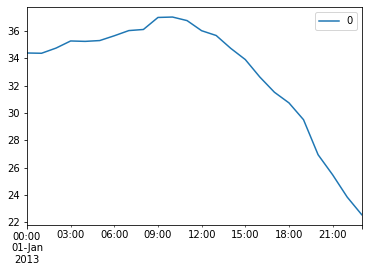

In [ ]:
df.plot()

In [ ]:
diff = df[0].diff().dropna()

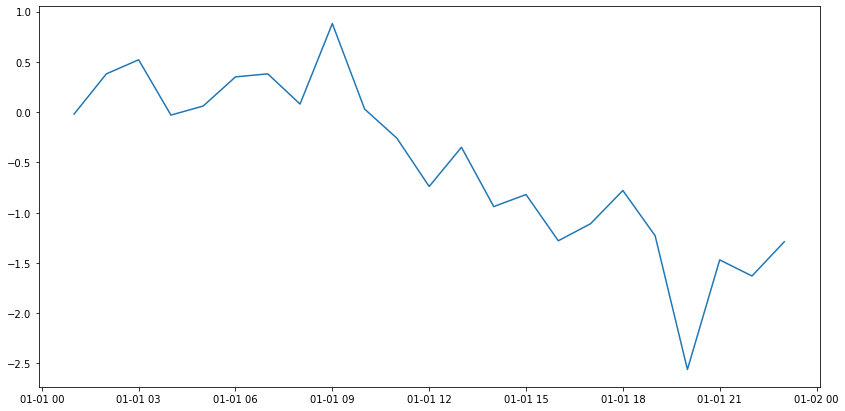

In [ ]:
fig, ax = plt.subplots(figsize = (14, 7))
ax.plot(diff)
plt.show()

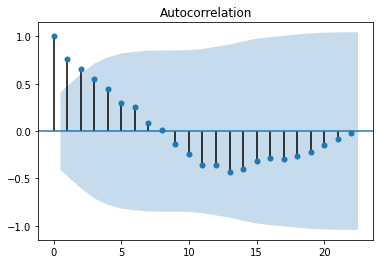

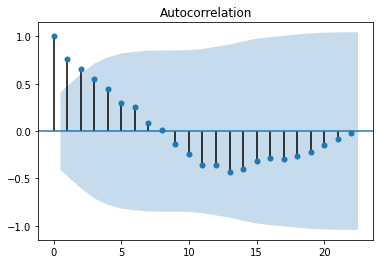

In [ ]:
fig, ax1 = plt.subplots()
plot_acf(diff, ax = ax1, lags = 22)

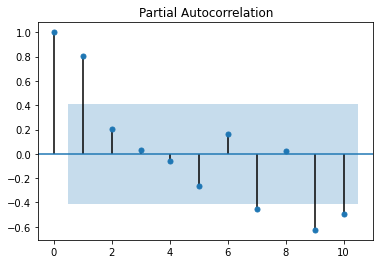

In [ ]:
fig, ax1 = plt.subplots()
plot_pacf(diff, ax = ax1, lags = 10);

In [ ]:
order = (0, 1, 0)
#seasonal_order = (1,0,1,2)
next_day = pd.date_range(start = end, periods = 1, freq = 'D')
#model_fit = SARIMAX(df[0], order = order, seasonal_order= seasonal_order, freq = 'H').fit(disp = 0)
model_fit = ARIMA(df[0], order = order, freq = 'H').fit(disp = 0)
dt_predict = pd.date_range(start = end + datetime.timedelta(days = 1), periods = n_days_predict * 24, freq = 'H')
predicted = model_fit.predict(start = dt_predict[0], end =  dt_predict[-1], typ = 'levels')
predicted.tolist()

[22.035652173913043,
 21.521304347826085,
 21.006956521739127,
 20.49260869565217,
 19.97826086956521,
 19.463913043478254,
 18.949565217391296,
 18.435217391304338,
 17.92086956521738,
 17.406521739130422,
 16.892173913043464,
 16.377826086956507,
 15.86347826086955,
 15.349130434782595,
 14.834782608695638,
 14.320434782608682,
 13.806086956521726,
 13.29173913043477,
 12.777391304347814,
 12.263043478260858,
 11.748695652173902,
 11.234347826086946,
 10.71999999999999,
 10.205652173913034]

In [ ]:
print(end)
print(end + datetime.timedelta(days = 1))
print(end + datetime.timedelta(days = n_days_predict))

2013-01-01 00:00:00
2013-01-02 00:00:00
2013-01-02 00:00:00


In [ ]:
dt_predict = pd.date_range(start = end + datetime.timedelta(days = 1), periods = n_days_predict * 24, freq = 'H')
dt_predict[0]

Timestamp('2013-01-02 00:00:00', freq='H')

In [ ]:
start + datetime.timedelta(days = 1)

Timestamp('2013-01-02 00:00:00')

In [ ]:
predicted

2013-01-02    22.035652
Freq: H, dtype: float64

In [ ]:
ans = pd.date_range(start = end, periods = 1, freq = 'D')
ans

DatetimeIndex(['2013-01-01'], dtype='datetime64[ns]', freq='D')

In [ ]:
end

Timestamp('2013-01-01 00:00:00')

In [ ]:
date = end + datetime.timedelta(days = 5)
date

Timestamp('2013-01-06 00:00:00')